In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [24]:
car_data = pd.read_csv('car data.csv')

In [25]:
car_data.shape

(301, 9)

In [26]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [27]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [28]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [29]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [30]:
#checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the data

In [31]:
#encoding the fuel_data Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding the seller type columns
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#endoding the Fuel Type column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [32]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [33]:
#Splitting the data into training and test data
data = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
label = car_data['Selling_Price']

In [34]:
data.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [35]:
label.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(data,label,test_size=.1,random_state=2)

In [37]:
print(data.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


# Model Training 

In [38]:
model_1 = LinearRegression()

In [39]:
model_1.fit(X_train,Y_train)

LinearRegression()

In [41]:
#Model Evaluation

#Prediction on training data
training_data_predicton = model_1.predict(X_train)

In [42]:
#R square error
error_score = metrics.r2_score(Y_train,training_data_predicton)

In [43]:
print('R square error: ',error_score)

R square error:  0.8799451660493703


Visualize the actual and predictive Price

Text(0.5, 1.0, 'Actual Prices vs Predictive Prices')

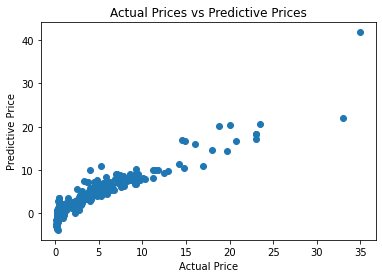

In [46]:
plt.scatter(Y_train, training_data_predicton)
plt.xlabel('Actual Price')
plt.ylabel('Predictive Price')
plt.title("Actual Prices vs Predictive Prices")

In [48]:
#Prediction on test data
test_data_predicton = model_1.predict(X_test)

error_score1 = metrics.r2_score(Y_test,test_data_predicton)
print('R square error: ',error_score1)

R square error:  0.8365766715024694


Text(0.5, 1.0, 'Actual Prices vs Predictive Prices')

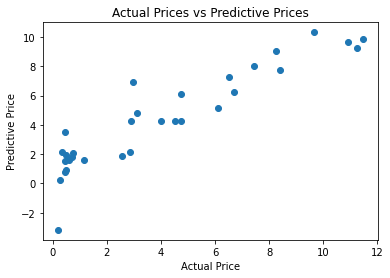

In [49]:
plt.scatter(Y_test, test_data_predicton)
plt.xlabel('Actual Price')
plt.ylabel('Predictive Price')
plt.title("Actual Prices vs Predictive Prices")

In [50]:
model_2 = Lasso()

In [51]:
model_2.fit(X_train,Y_train)

Lasso()

In [52]:
training_data_predicton_1 = model_2.predict(X_train)

#R square error
error_score_1 = metrics.r2_score(Y_train,training_data_predicton_1)

print('R square error: ',error_score_1)

R square error:  0.8427856123435795


Text(0.5, 1.0, 'Actual Prices vs Predictive Prices')

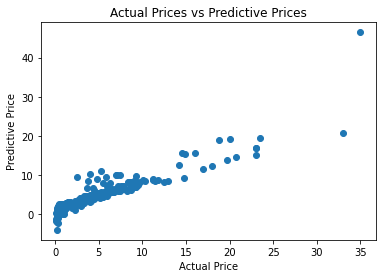

In [56]:
plt.scatter(Y_train, training_data_predicton_1)
plt.xlabel('Actual Price')
plt.ylabel('Predictive Price')
plt.title("Actual Prices vs Predictive Prices")

In [58]:
training_data_predicton_2 = model_2.predict(X_test)

#R square error
error_score_2 = metrics.r2_score(Y_test,training_data_predicton_2)

print('R square error: ',error_score_2)

R square error:  0.8709167941173195


Text(0.5, 1.0, 'Actual Prices vs Predictive Prices')

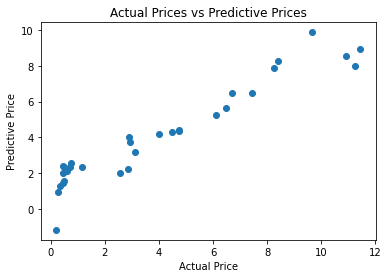

In [59]:
plt.scatter(Y_test, training_data_predicton_2)
plt.xlabel('Actual Price')
plt.ylabel('Predictive Price')
plt.title("Actual Prices vs Predictive Prices")